c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 167s 78ms/step - accuracy: 0.6800 - loss: -7.8379 - val_accuracy: 0.6754 - val_loss: -27.8656
Epoch 2/10
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 186s 89ms/step - accuracy: 0.6813 - loss: -35.7278 - val_accuracy: 0.6810 - val_loss: -57.0545
Epoch 3/10
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 184s 89ms/step - accuracy: 0.6884 - loss: -66.2334 - val_accuracy: 0.6852 - val_loss: -89.3326
Epoch 4/10
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 152s 73ms/step - accuracy: 0.6966 - loss: -96.9843 - val_accuracy: 0.6908 - val_loss: -118.8455
Epoch 5/10
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 151s 73ms/step - accuracy: 0.6981 - loss: -130.7569 - val_accuracy: 0.6908 - val_loss: -149.3880
Epoch 6/10
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 164s 79ms/step - accuracy: 0.7080 - loss: -158.9173 - val_accuracy: 0.6893 - val_loss: -179.0042
Epoch 7/10
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 186s 90ms/step - accuracy: 0.7085 - loss: -191.4712 - val_accuracy: 0.6885 - val_loss: -209.5002
Epoch 8/10
2073/2073 ━━━━━━━━━━━━━━

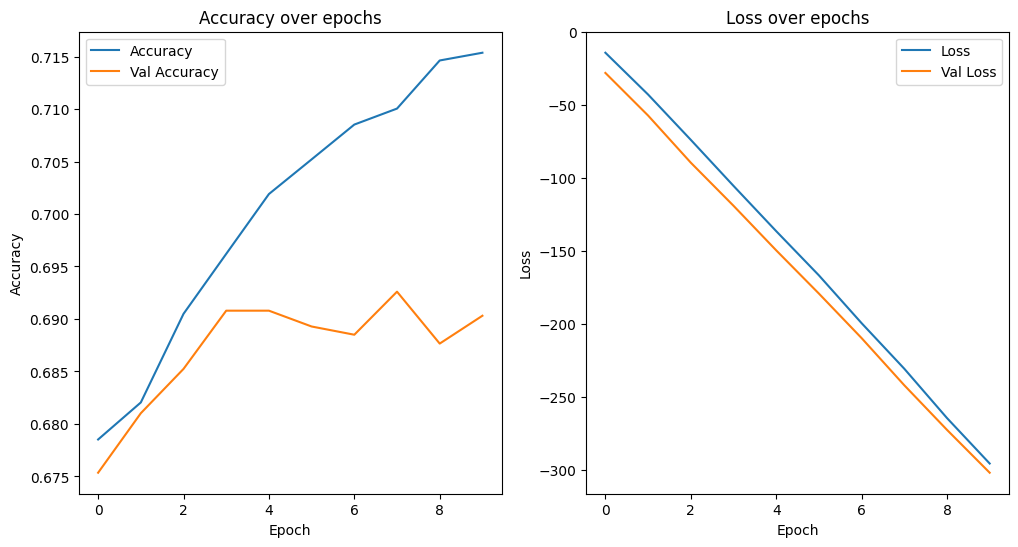

519/519 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step
              precision    recall  f1-score   support

           0       0.63      0.57      0.59      1045
           1       0.69      0.97      0.81     11197
           2       0.00      0.00      0.00      4339

    accuracy                           0.69     16581
   macro avg       0.44      0.51      0.47     16581
weighted avg       0.51      0.69      0.58     16581



c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load your dataset
df = pd.read_csv('labelled_data.csv')

# Prepare text data
texts = df['Comment Text']
labels = df['Sentiment Label']

# Map the sentiment labels to numerical values
label_mapping = {'NEG': 0, 'NEU': 1, 'POS': 2}
labels = labels.map(label_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Build the BiLSTM model
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with progress bar and plot learning curves
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')

plt.show()

# Predict and evaluate
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
